# Installation + Import
Install and import required libraries

In [1]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr
/kaggle/input/amex-data-integer-dtypes-parquet-format/train.parquet
/kaggle/input/amex-data-integer-dtypes-parquet-format/test.parquet


In [2]:
!pip install imblearn
!pip install LightGBM
!pip install XGBosst
!pip install CatBoost

ERROR: Could not find a version that satisfies the requirement XGBosst (from versions: none)
ERROR: No matching distribution found for XGBosst


In [3]:
# Import Library
import gc
from itertools import product

# Graphic Components
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Inference Analyis
import statsmodels.api as sm
import scipy.stats as stats

# Data Precessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Model
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import lightgbm as lgbm
import xgboost as xgb 
import catboost

# Feature Selection/ Model Optimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier

# Validation 
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
Train_df = pd.read_feather('../input/amexfeather/train_data.ftr')
Train_df.head()

#Test_df = pd.read_feather('../input/amexfeather/test_data.ftr')
#Test_df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938477,0.001734,0.008728,1.006836,0.009224,0.124023,0.008774,0.004707,...,NaN,NaN,0.002426,0.003706,0.003819,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936523,0.005775,0.004925,1.000977,0.006153,0.126709,0.000798,0.002714,...,NaN,NaN,0.003956,0.003166,0.005032,NaN,0.009575,0.005493,0.009216,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954102,0.091492,0.021652,1.009766,0.006817,0.123962,0.007599,0.009422,...,NaN,NaN,0.003269,0.007328,0.000427,NaN,0.003429,0.006985,0.002604,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960449,0.002455,0.013687,1.002930,0.001372,0.117188,0.000685,0.005531,...,NaN,NaN,0.006119,0.004517,0.003201,NaN,0.008423,0.006527,0.009598,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947266,0.002483,0.015190,1.000977,0.007607,0.117310,0.004654,0.009308,...,NaN,NaN,0.003672,0.004944,0.008888,NaN,0.001670,0.008125,0.009827,0


In [5]:
Train_df.shape

(5531451, 191)

As all features of the dataset are masked, we cannot rely on domain knowledge nor common sense to get a general picture on the dataset. Let us make some wild guesses by examining the data type of each feature.

In [6]:
Train_df.dtypes.to_list()

[dtype('O'),
 dtype('<M8[ns]'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),
 dtype('float16'),

We observe that the customer ID is duplicated and there is a datetime column (S_2). 11 features are categorial data, and the remaining are all numeric features. Although the information is still very limited, the above result implies that the dataset should be very likely a transaction data.

Given this observation, there is two ways ahead. The first is time-series analysis on the features, and the second should be taking the latest snapshot with a lower scale. However, the second way is quite dangerous as it may overlook some time-serial features and distort the features importance. 

However, under the limited capacity of Kaggle Environment, we can only take the first way. Let us return if any chances!

In [7]:
Train_df = Train_df.groupby('customer_ID').tail(1)
Train_df.shape

(458913, 191)

Dataset has been scaled down 10x when taking the latest records only.

In [8]:
Null_Check = pd.DataFrame({'Columns':Train_df.columns,
                           'Null Ratio':Train_df.isna().sum().values / len(Train_df)}).sort_values(by = ['Null Ratio'], ascending = False)
Null_Check.head(20)

,Columns,Null Ratio
108,D_87,0.998595
111,D_88,0.998198
146,D_108,0.994276
149,D_111,0.991985
148,D_110,0.991985
150,B_39,0.991055
74,D_73,0.990763
172,B_42,0.986616
178,D_134,0.964274
179,D_135,0.964274


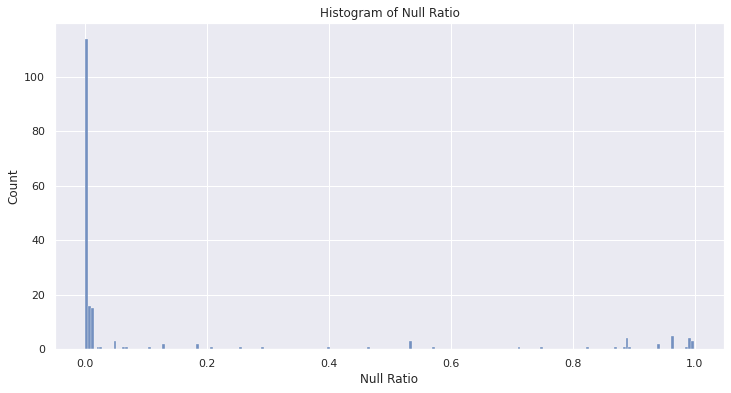

In [9]:
sns.set_theme()
plt.figure(figsize=(12, 6))
sns.histplot(Null_Check['Null Ratio'])
plt.title('Histogram of Null Ratio')
plt.show()

In [10]:
print('Null Ratio Median:', Null_Check['Null Ratio'].quantile(.5))
print('Null Ratio Average:', Null_Check['Null Ratio'].mean())

Null Ratio Median: 6.755093013272669e-05
Null Ratio Average: 0.14826697866274785


In [11]:
for i in np.linspace(0,1, 11).round(1):
    print(i, len(Null_Check[Null_Check['Null Ratio'] > i]))
    
Drop_Columns = Null_Check[Null_Check['Null Ratio'] > 0.7]['Columns']
Drop_Columns

0.0 108
0.1 39
0.2 34
0.3 31
0.4 31
0.5 29
0.6 25
0.7 25
0.8 23
0.9 15
1.0 0


108     D_87
111     D_88
146    D_108
149    D_111
148    D_110
150     B_39
74      D_73
172     B_42
178    D_134
179    D_135
180    D_136
181    D_137
182    D_138
87       R_9
104     B_29
78      D_76
143     R_26
139    D_106
175    D_132
20      D_49
60      D_66
10      D_42
186    D_142
94      D_82
31      D_53
Name: Columns, dtype: object

The histogram shows that most of the most columns are fine (close to left tail 0% null ratio), except some outliners. Let us remove these cases as they should have very limited importance to our models.

In [12]:
Train_df = Train_df.drop(columns = Null_Check[Null_Check['Null Ratio'] > 0.7]['Columns'])
Train_df.shape

(458913, 166)

In [13]:
Train_df['target'].value_counts()

0    340085
1    118828
Name: target, dtype: int64

The distribution of target is 3:1. We will keep this in mind and handle it in the later section.

In [14]:
del Null_Check
gc.collect()

15384

# Exploration Data Analysis

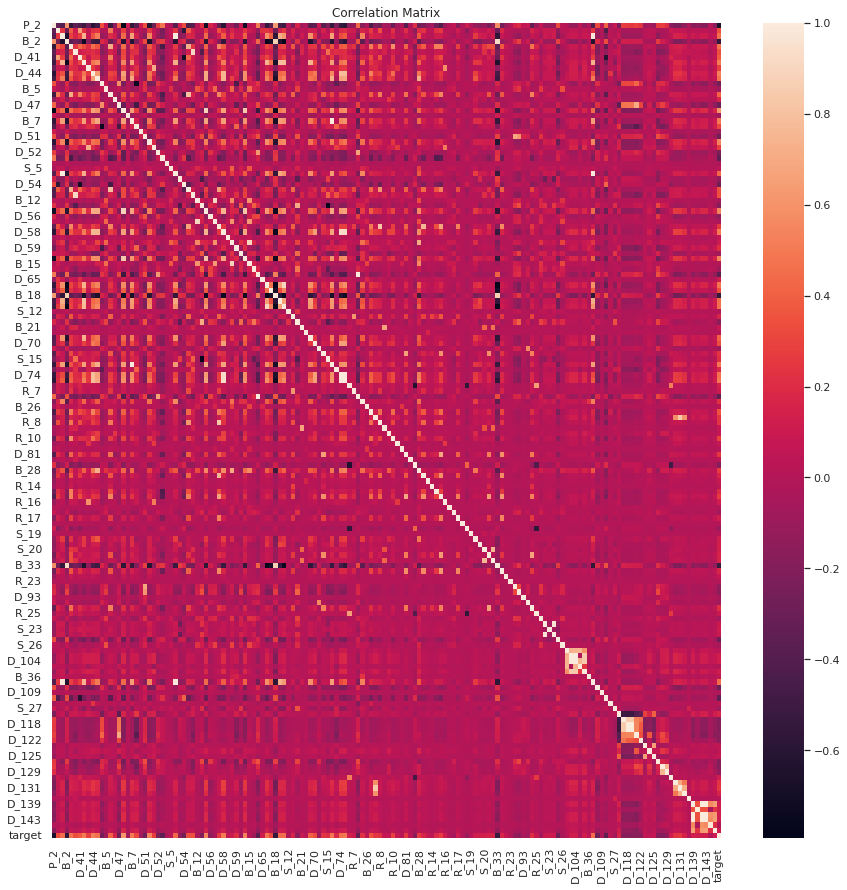

In [15]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(Train_df.corr())
plt.title('Correlation Matrix')
plt.show()

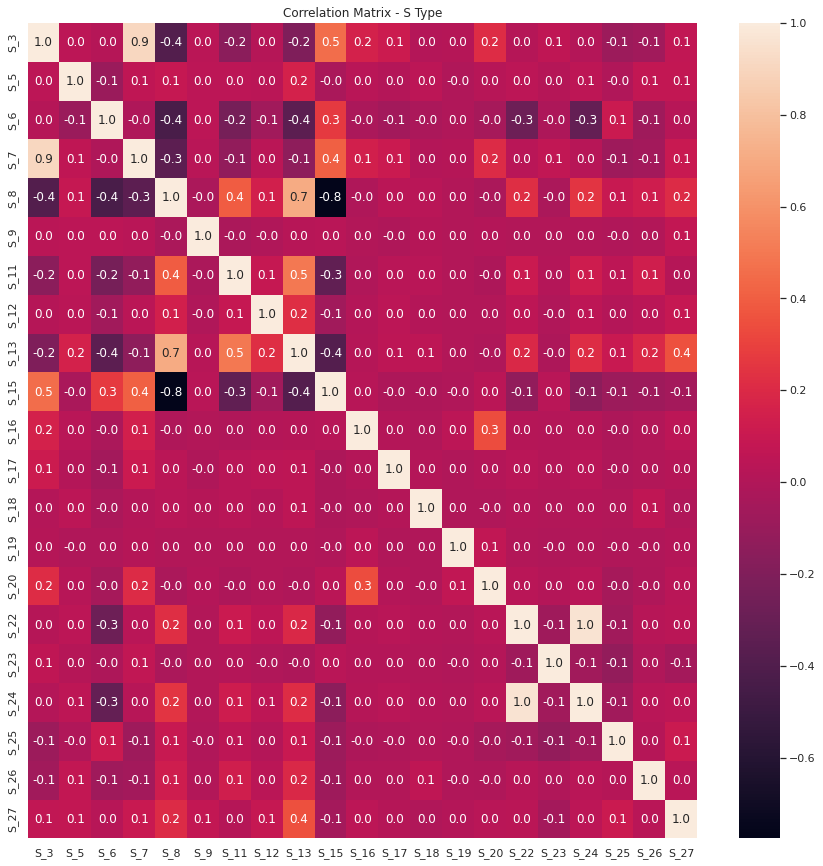

In [16]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(Train_df[[i for i in Train_df.columns if 'S' in i]].corr(), annot = True, fmt='.1f')
plt.title('Correlation Matrix - S Type')
plt.show()

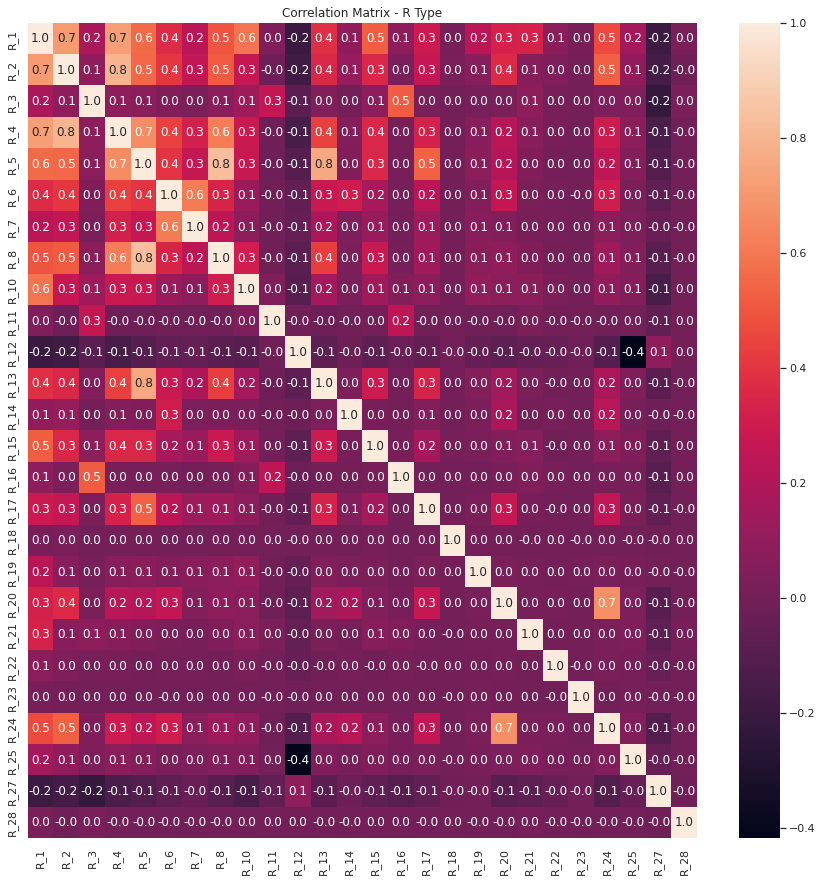

In [17]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(Train_df[[i for i in Train_df.columns if 'R' in i]].corr(), annot = True, fmt='.1f')
plt.title('Correlation Matrix - R Type')
plt.show()

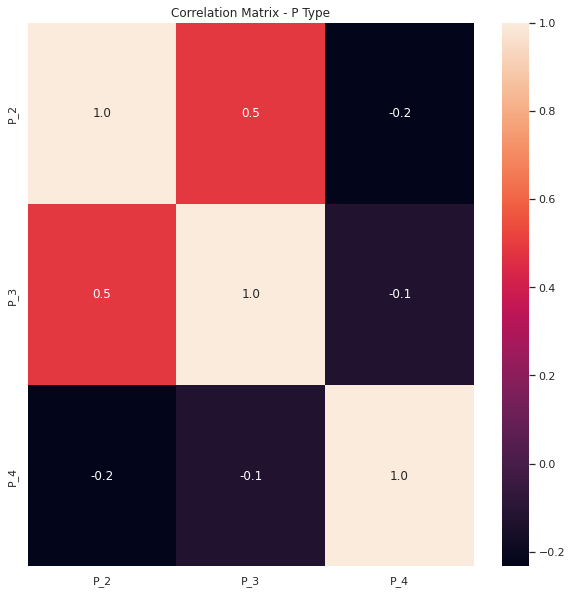

In [18]:
sns.set_theme()
plt.figure(figsize=(10, 10))
sns.heatmap(Train_df[[i for i in Train_df.columns if 'P' in i]].corr(), annot = True, fmt='.1f')
plt.title('Correlation Matrix - P Type')
plt.show()

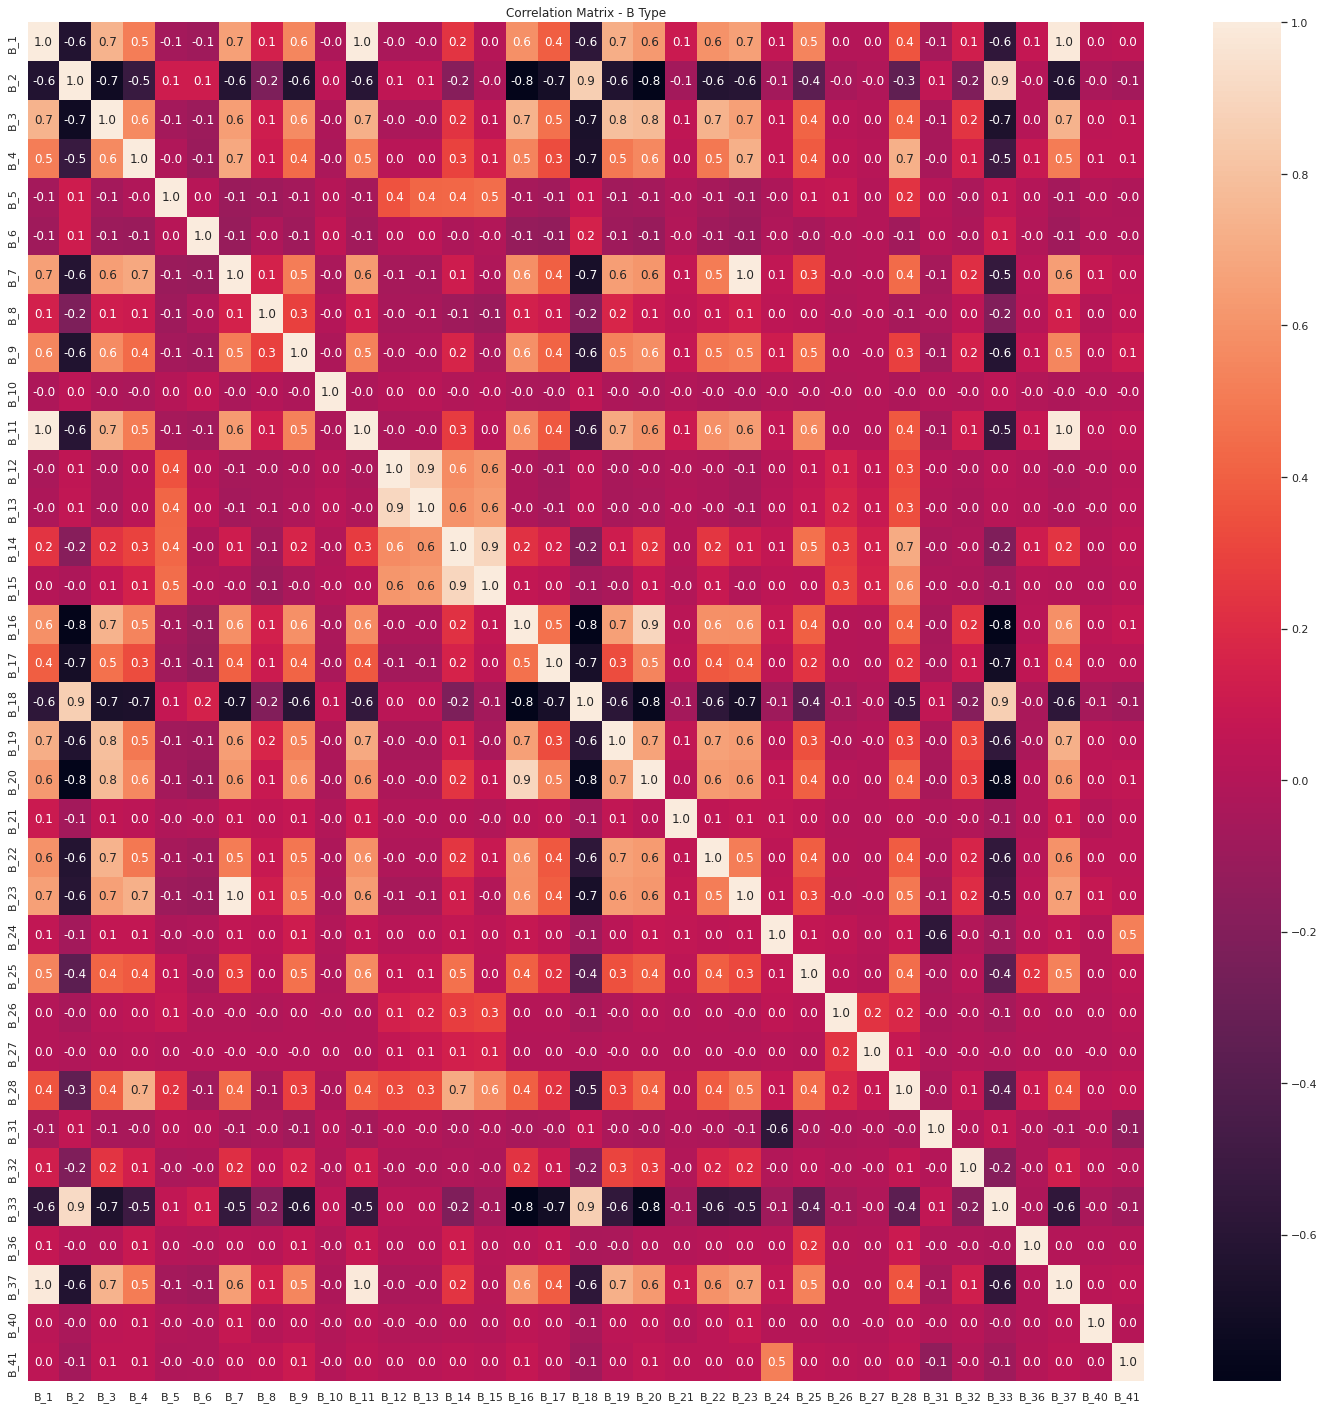

In [19]:
sns.set_theme()
plt.figure(figsize=(25, 25))
sns.heatmap(Train_df[[i for i in Train_df.columns if 'B' in i]].corr(), annot = True, fmt='.1f')
plt.title('Correlation Matrix - B Type')
plt.show()

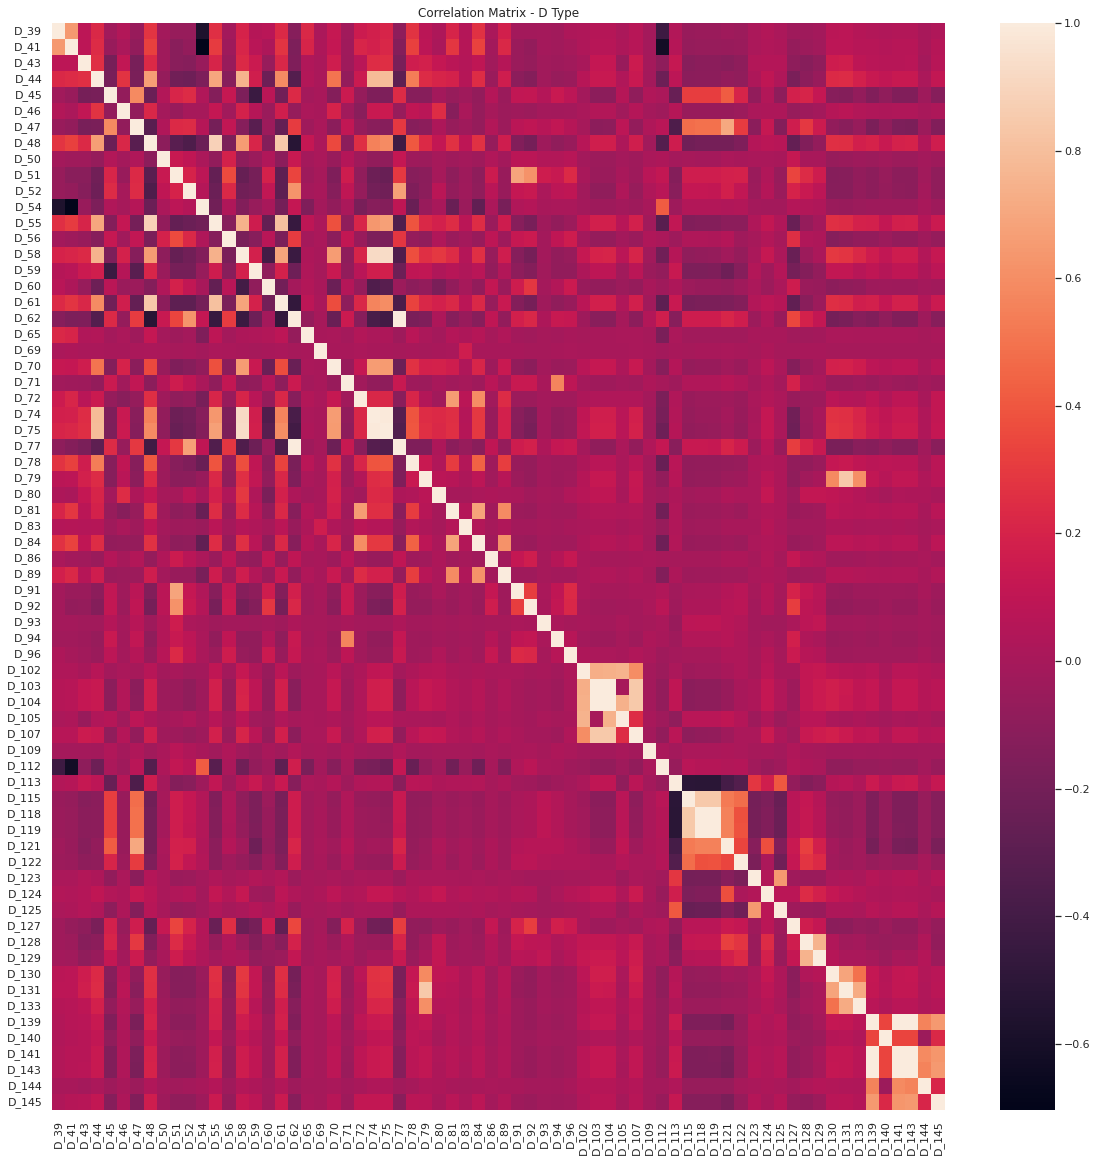

In [20]:
sns.set_theme()
plt.figure(figsize=(20, 20))
sns.heatmap(Train_df[[i for i in Train_df.columns if 'D' in i]].corr())
plt.title('Correlation Matrix - D Type')
plt.show()

From the above heatmaps, we found a lot collinear variables. These variables will cause us not only the problem of dimensionality curse but also noises during computatuion, which undermines our statistical inference thus model performances. Let us do a dimensional reduction by the category.

# PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [22]:
# Prepare for a PCA 
Master_df = Train_df[['customer_ID','target']].reset_index(drop = True)

# Categorial
PCA_Cat = Train_df.select_dtypes(include='category').reset_index(drop = True)

for i in PCA_Cat.columns:
    PCA_Cat[i].fillna(PCA_Cat[i].quantile(.5), inplace = True)
    
PCA_Cat = pd.get_dummies(PCA_Cat, drop_first= True)

# Numeric and Normalize
PCA_Numeric = Train_df.select_dtypes(include=['float16']).reset_index(drop = True)

for i in PCA_Numeric.columns:
    PCA_Numeric[i] = PCA_Numeric[i].astype('float64')
    PCA_Numeric[i] = PCA_Numeric[i].fillna(PCA_Numeric[i].mean())

PCA_Numeric = pd.DataFrame(StandardScaler().fit_transform(PCA_Numeric), columns = PCA_Numeric.columns)
    
# Concat
PCA_df = pd.concat([PCA_Cat, PCA_Numeric], axis = 1)

In [23]:
PCA_Model = PCA(n_components=3, random_state=0)

for cat in ['S','R','B','P','D']:
    
    Temp = pd.DataFrame(PCA_Model.fit_transform(PCA_df[[i for i in PCA_df.columns if cat in i]]))
    Temp.columns = [cat +'_'+ str(name) for name in Temp.columns]
    Master_df = pd.concat([Master_df, Temp], axis = 1)
    
Master_df.head()

,customer_ID,target,S_0,S_1,S_2,R_0,R_1,R_2,B_0,B_1,B_2,P_0,P_1,P_2,D_0,D_1,D_2
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,-1.723903,0.051259,0.642359,-0.785751,-0.671147,-0.133209,-2.806775,0.250631,-0.252993,-1.065267,-0.091831,-0.573055,-3.518565,-1.937268,-4.216885
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,-0.642607,0.023699,-0.232574,-0.653890,-0.441091,-0.076677,-2.870347,-0.152963,-0.230734,-0.733089,-0.254323,-0.630896,-3.447218,0.065936,1.186780
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,2.049066,1.087463,0.039973,-0.737042,-0.657642,-0.114391,-2.755057,-0.249673,-0.183600,-0.932513,-0.130188,-0.426022,-2.833887,0.820922,1.609054
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,0.157526,-0.702152,0.130923,-0.675930,2.069946,0.026743,-2.673259,-0.179176,0.011299,-0.415875,-0.148240,0.429184,-2.727218,1.422362,0.261711
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,1.975909,1.105002,0.073181,-0.863291,-0.662013,-0.027143,-1.688418,-0.259533,-0.045585,-0.705027,-0.246906,-0.612748,-0.450923,-2.019587,-2.420889


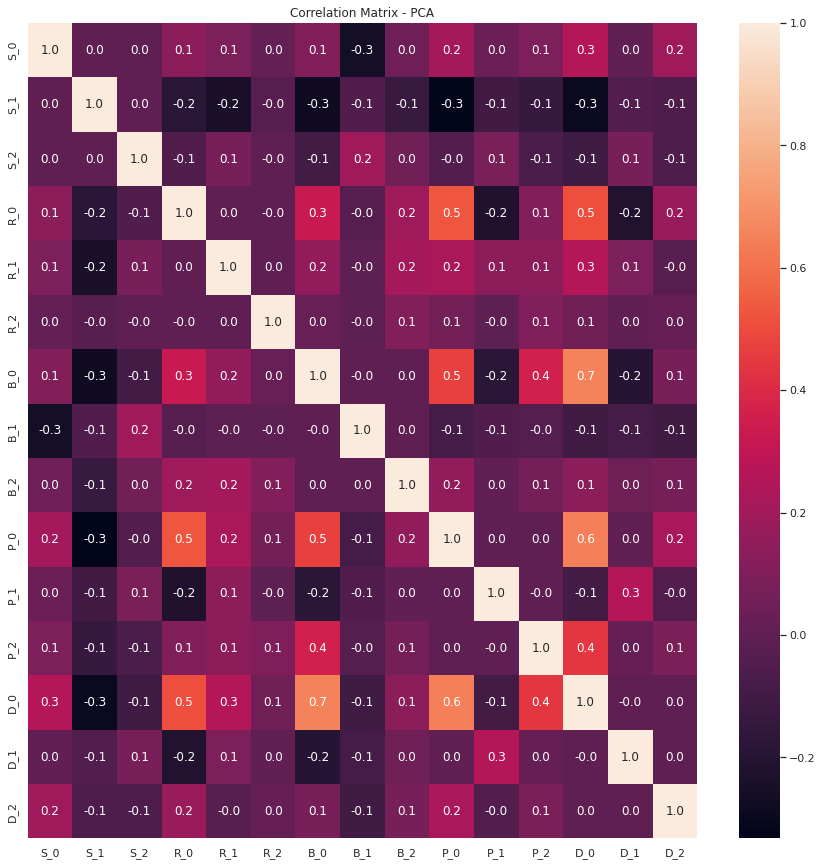

In [24]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(Master_df.iloc[:, 2:].corr(),annot = True, fmt='.1f')
plt.title('Correlation Matrix - PCA')
plt.show()

We have reduced into only 10 variables and the problem multicollinearity is now more improved, where the max R coefficient is around .7. However, it still exceeds the conventional threshold of collinear where the absolute value of R coefficient is equal or higher than .6. It seems that the variables categoriztion (R, S, B, D, P) is not as independent as we thought. There are some interwining impacts among these categories.

Here are some observations:
1. S, R features are quite independent and non-collinear.
2. D, P and B are still quite collinear (D_0 and B_0 and P_0).

In [25]:
import statsmodels.api as sm
Regression = sm.add_constant(Master_df.iloc[:,2:])
logit_mod = sm.Logit(Master_df['target'],Regression)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.254010
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               458913
Model:                          Logit   Df Residuals:                   458897
Method:                           MLE   Df Model:                           15
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.5559
Time:                        14:52:59   Log-Likelihood:            -1.1657e+05
converged:                       True   LL-Null:                   -2.6247e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1377      0.008   -267.213      0.000      -2.153      -2.122
S_0            0.1198      0.

Most of the variables are signficant after PCA. And we observe that the importance of Spending variables is quite light. The most significant variables are payment related. Let us have a try to do a PCA in general instead.

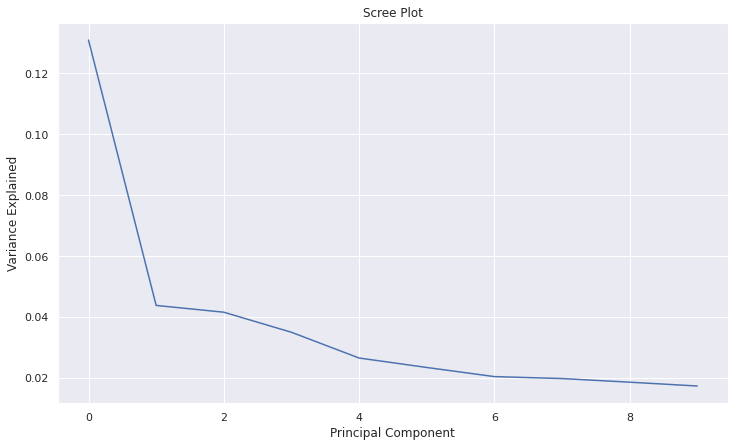

In [26]:
# Scree 
PCA_Model = PCA(n_components=10, random_state=0)
PCA_Model.fit(PCA_df)

plt.figure(figsize=(12, 7))
plt.plot(PCA_Model.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The optimal number of compontents should be around 4-6. Let us use 6 componentents for our models.

In [27]:
PCA_Model = PCA(n_components=6, random_state=0)
Temp = pd.DataFrame(PCA_Model.fit_transform(PCA_df))
Master_df = pd.concat([Master_df.iloc[:, :2], Temp], axis = 1)
Master_df

,customer_ID,target,0,1,2,3,4,5
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,-4.850619,2.970343,1.733563,1.167433,-2.917475,-0.204844
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,-4.491983,0.057367,1.045057,-0.803666,1.411919,-0.341656
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,-4.085777,-1.652970,0.405176,-1.961000,1.325001,0.357018
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,-3.648476,-1.134289,0.218404,1.283255,0.808269,0.712245
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,-1.775788,-0.314200,-0.203814,-2.290485,-3.506681,1.697279
...,...,...,...,...,...,...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0,-3.984856,0.668818,0.839205,3.334937,-0.182009,0.503526
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0,2.307510,2.426324,-1.588369,-3.581205,-3.307324,1.373747
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0,-3.955518,0.110376,0.551934,1.390615,-0.592149,-0.519092
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1,0.798754,-2.639868,-1.969714,1.820498,-2.435879,-1.307052


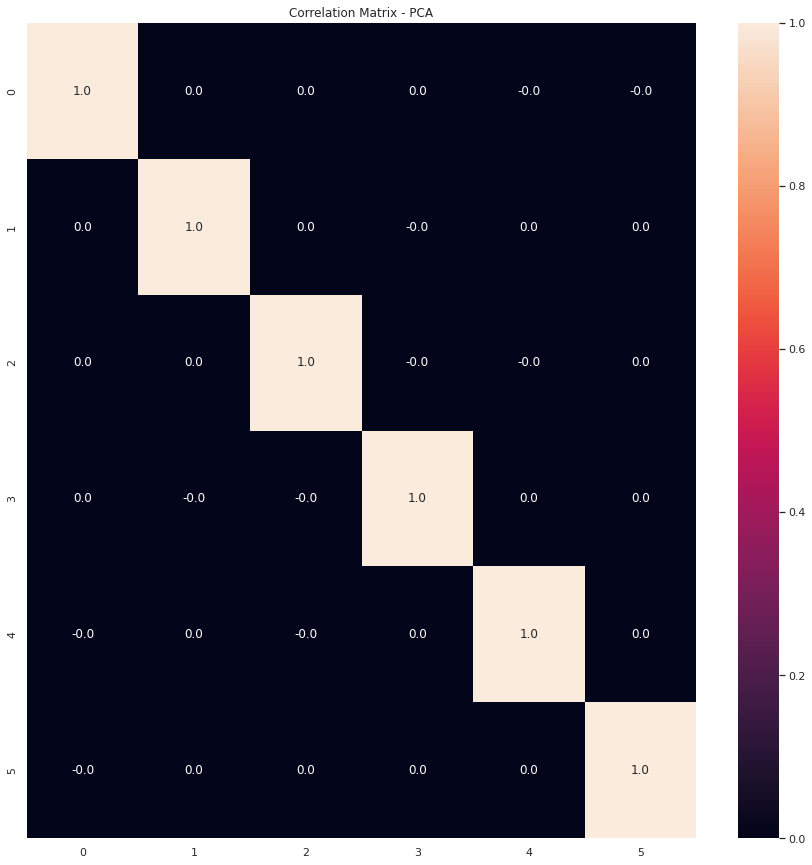

In [28]:
sns.set_theme()
plt.figure(figsize=(15, 15))
sns.heatmap(Master_df.iloc[:, 2:].corr(),annot = True, fmt='.1f')
plt.title('Correlation Matrix - PCA')
plt.show()

In [29]:
import statsmodels.api as sm
Regression = sm.add_constant(Master_df.iloc[:,2:])
logit_mod = sm.Logit(Master_df['target'],Regression)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.259739
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               458913
Model:                          Logit   Df Residuals:                   458906
Method:                           MLE   Df Model:                            6
Date:                Thu, 30 Jun 2022   Pseudo R-squ.:                  0.5459
Time:                        14:53:20   Log-Likelihood:            -1.1920e+05
converged:                       True   LL-Null:                   -2.6247e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9579      0.007   -262.099      0.000      -1.973      -1.943
0              0.6461      0.

After a complete PCA, all variables are now significant (p<0.05). The pseudo R-squ (0.5459) is just slighly lower than the model with the above with collinear. The next step will be building a data model on the PCA data.

# Data Models

As mentioned above that the target ratio is 3:1 which may cause bias on our models, let us use SMOTE oversampling method to make create a balance sample.

In [30]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(Master_df.iloc[:,2:], Master_df['target'])

In [31]:
y.value_counts()

0    340085
1    340085
Name: target, dtype: int64

In [32]:
# Train Test Split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Build a DataFrame To Score the Performance

Performance_df = pd.DataFrame(columns = ['Model', 'Feature Selection', 'Accuracy', 'Log Loss', 'ROC', 'Amex Metric'])
Performance_df

,Model,Feature Selection,Accuracy,Log Loss,ROC,Amex Metric


In [34]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

# Logit Regression

In [35]:
# Randomized Cross Validation for Hyperparameters Tuning

def Logit_Randomize_CV(X,y, parameters, k = -1):
    
    # Create Parameter Combination
    keys, values = zip(*parameters.items())
    result = [dict(zip(keys, p)) for p in product(*values)]
    
    if k != -1:

        result = np.random.choice(result, k, replace = False)
    
    best_score = -1
    best_parameter = {}
    best_model = None
    
    # Train Test Split
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for i in result:
        
        Logit = LogisticRegression(**i)
        Logit.fit(train_X, train_y)
        
        pred = Logit.predict(test_X)
        amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
        amex_prediction = pd.DataFrame({'prediction': Logit.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
        score = amex_metric(amex_actual,amex_prediction)
        
        if score > best_score:
            best_score = score
            best_parameter = i
            best_model = Logit
        
        print(f'{i}: {score}')
        
    print(f'Best Parameters - {best_parameter}: {best_score}')
    
    return best_model

In [36]:
# Pools of Parameters
random_parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                     'C' :[100, 10, 1.0, 0.1, 0.01]
                    }

Logit = Logit_Randomize_CV(train_X,train_y, random_parameters)

{'solver': 'newton-cg', 'C': 100}: 0.686325100471794
{'solver': 'newton-cg', 'C': 10}: 0.6863250951781563
{'solver': 'newton-cg', 'C': 1.0}: 0.6863250657690583
{'solver': 'newton-cg', 'C': 0.1}: 0.686317780047821
{'solver': 'newton-cg', 'C': 0.01}: 0.686286707533925
{'solver': 'lbfgs', 'C': 100}: 0.6863250971387628
{'solver': 'lbfgs', 'C': 10}: 0.6863250983151267
{'solver': 'lbfgs', 'C': 1.0}: 0.6863250720429993
{'solver': 'lbfgs', 'C': 0.1}: 0.6863177829887308
{'solver': 'lbfgs', 'C': 0.01}: 0.6862866847908893
{'solver': 'liblinear', 'C': 100}: 0.6863251098827053
{'solver': 'liblinear', 'C': 10}: 0.6863251167448282
{'solver': 'liblinear', 'C': 1.0}: 0.686325160858475
{'solver': 'liblinear', 'C': 0.1}: 0.6863185717407376
{'solver': 'liblinear', 'C': 0.01}: 0.6862943658590899
Best Parameters - {'solver': 'liblinear', 'C': 1.0}: 0.686325160858475


In [37]:
# Validation
pred = Logit.predict(test_X)
amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
amex_prediction = pd.DataFrame({'prediction': Logit.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
Performance_df = Performance_df.append(pd.DataFrame([['Logit', 'Full', accuracy_score(test_y, pred), log_loss(test_y, pred), roc_auc_score(test_y, pred), amex_metric(amex_actual,amex_prediction)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC','Amex Metric']), sort = False)

print('Accuracy:', accuracy_score(test_y, pred))
print('Log Loss:', log_loss(test_y, pred))
print('ROC Accuracy:', roc_auc_score(test_y, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(test_y, pred))
print('Amex Metric:', amex_metric(amex_actual,amex_prediction))

Accuracy: 0.8764181503643697
Log Loss: 4.268417110851992
ROC Accuracy: 0.8764176774775294
Confusion Matrix:
 [[88939 13076]
 [12141 89895]]
Amex Metric: 0.6886680311377892


# Support Vector

In [38]:
def SVM_Bagging_Randomize_CV(X,y, parameters, k = -1):
    
    # Create Parameter Combination
    keys, values = zip(*parameters.items())
    result = [dict(zip(keys, p)) for p in product(*values)]
    
    if k != -1:

        result = np.random.choice(result, k, replace = False)
        
    best_score = -1
    best_parameter = {}
    best_model = None
    
    # Train Test Split
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for i in result:
        
        Support_Vector = BaggingClassifier(base_estimator=SVC(**i), 
                                           n_estimators=64,
                                           max_samples = 128, 
                                           random_state=0,
                                           n_jobs = -1)

        Support_Vector.fit(train_X, train_y)
        
        pred = Support_Vector.predict(test_X)
        amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
        amex_prediction = pd.DataFrame({'prediction': Support_Vector.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
        score = amex_metric(amex_actual,amex_prediction)
        
        if score > best_score:
            best_score = score
            best_parameter = i
            best_model = Support_Vector
        
        print(f'{i}: {score}')
        
    print(f'Best Parameters - {best_parameter}: {best_score}')
    
    return best_model

In [39]:
# Pools of Parameters   

random_parameters = {'C': [1, 10, 100], 
                     'gamma': [0.1,0.01, 0.001],
                     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                     }

Support_Vector = SVM_Bagging_Randomize_CV(train_X,train_y, random_parameters, 15)

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}: 0.6246116834718303
{'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}: 0.5551222299846912
{'C': 10, 'gamma': 0.001, 'kernel': 'poly'}: 0.08822081879714908
{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}: 0.6199256951217706
{'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}: 0.5508017315415025
{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}: 0.5656658069345132
{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}: 0.6258314561850733
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}: 0.5382227957645815
{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}: 0.6692490922041061
{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}: 0.5788234769999383
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}: 0.6340486971695669
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}: 0.5734543201453104
{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}: 0.6285619248870854
{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}: 0.6246116834718303
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}: 0.6133384129385011
Best Parameters - {'C': 1, 'gamma': 0.1, '

In [40]:
# Validation
pred = Support_Vector.predict(test_X)
amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
amex_prediction = pd.DataFrame({'prediction': Support_Vector.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
Performance_df = Performance_df.append(pd.DataFrame([['Support_Vector', 'Full', accuracy_score(test_y, pred), log_loss(test_y, pred), roc_auc_score(test_y, pred), amex_metric(amex_actual,amex_prediction)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC','Amex Metric']), sort = False)

print('Accuracy:', accuracy_score(test_y, pred))
print('Log Loss:', log_loss(test_y, pred))
print('ROC Accuracy:', roc_auc_score(test_y, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(test_y, pred))
print('Amex Metric:', amex_metric(amex_actual,amex_prediction))

Accuracy: 0.8696551352357988
Log Loss: 4.502001642186391
ROC Accuracy: 0.8696558051602673
Confusion Matrix:
 [[89382 12633]
 [13964 88072]]
Amex Metric: 0.6712554012315234


# XGBoost

In [41]:
def XGBoost_Randomize_CV(X,y, parameters, k = -1):
    
    # Create Parameter Combination
    keys, values = zip(*parameters.items())
    result = [dict(zip(keys, p)) for p in product(*values)]
    
    # If -1 Then Grid Search
    if k != -1:

        result = np.random.choice(result, k, replace = False)
        
    best_score = -1
    best_parameter = {}
    
    # Train Test Split
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for i in result:
        

        XGB_Model = xgb.XGBClassifier(**i,
                                      early_stopping_rounds = 10,
                                      verbosity = 0,
                                       
                                      n_jobs = -1).fit(train_X, train_y, eval_set = [(test_X, test_y)], verbose=False)
        
        pred = XGB_Model.predict(test_X).round().astype(int)
        amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
        amex_prediction = pd.DataFrame({'prediction':XGB_Model.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
        score = amex_metric(amex_actual,amex_prediction)
        
        if score > best_score:
            best_score = score
            best_parameter = i
            best_model = XGB_Model
        
        print(f'{i}: {score}')

        
    print(f'Best Parameters - {best_parameter}: {best_score}')
    
    return best_model

In [42]:
random_parameters = {'max_depth':[9,10,11,12],
                      'min_child_weight': [5,6,7,8],
                      'eta':[.1, .01, .001],
                      'objective':['binary:logistic'],
                      'tree_method': ['gpu_hist'],
                      'eval_metric': ['rmsle'],
}

XGB_Best = XGBoost_Randomize_CV(train_X,train_y, random_parameters)

{'max_depth': 9, 'min_child_weight': 5, 'eta': 0.1, 'objective': 'binary:logistic', 'tree_method': 'gpu_hist', 'eval_metric': 'rmsle'}: 0.6949987698409144
{'max_depth': 9, 'min_child_weight': 5, 'eta': 0.01, 'objective': 'binary:logistic', 'tree_method': 'gpu_hist', 'eval_metric': 'rmsle'}: 0.6878379221940399
{'max_depth': 9, 'min_child_weight': 5, 'eta': 0.001, 'objective': 'binary:logistic', 'tree_method': 'gpu_hist', 'eval_metric': 'rmsle'}: 0.6836177628982503
{'max_depth': 9, 'min_child_weight': 6, 'eta': 0.1, 'objective': 'binary:logistic', 'tree_method': 'gpu_hist', 'eval_metric': 'rmsle'}: 0.695556952914612
{'max_depth': 9, 'min_child_weight': 6, 'eta': 0.01, 'objective': 'binary:logistic', 'tree_method': 'gpu_hist', 'eval_metric': 'rmsle'}: 0.6880914876328645
{'max_depth': 9, 'min_child_weight': 6, 'eta': 0.001, 'objective': 'binary:logistic', 'tree_method': 'gpu_hist', 'eval_metric': 'rmsle'}: 0.6837319283817155
{'max_depth': 9, 'min_child_weight': 7, 'eta': 0.1, 'objective': 

In [43]:
# Validation
pred = XGB_Best.predict(test_X).round().astype(int)
amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
amex_prediction = pd.DataFrame({'prediction':XGB_Best.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
Performance_df = Performance_df.append(pd.DataFrame([['XGBC', 'Full', accuracy_score(test_y, pred), log_loss(test_y, pred), roc_auc_score(test_y, pred), amex_metric(amex_actual,amex_prediction)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC','Amex Metric']), sort = False)

print('Accuracy:', accuracy_score(test_y, pred))
print('Log Loss:', log_loss(test_y, pred))
print('ROC Accuracy:', roc_auc_score(test_y, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(test_y, pred))
print('Amex Metric:', amex_metric(amex_actual,amex_prediction))

Accuracy: 0.8876996437165219
Log Loss: 3.878774220171353
ROC Accuracy: 0.8876964433627016
Confusion Matrix:
 [[87386 14629]
 [ 8286 93750]]
Amex Metric: 0.6984255585639869


# LGBM

In [44]:
def LGBM_Randomize_CV(X,y, parameters, k = -1):
    
    # Create Parameter Combination
    keys, values = zip(*parameters.items())
    result = [dict(zip(keys, p)) for p in product(*values)]
    
    # If -1 Then Grid Search
    if k != -1:

        result = np.random.choice(result, k, replace = False)
        
    best_score = -1
    best_parameter = {}
    best_model = None
    
    # Train Test Split
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for i in result:
        
        LGBM_Model = lgbm.LGBMClassifier(**i,
                                         device = 'gpu',
                                         gpu_platform_id= 0,
                                         gpu_device_id= 0,
                                         n_jobs = -1).fit(train_X, train_y)
        

        pred = LGBM_Model.predict(test_X).round().astype(int)
        amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
        amex_prediction = pd.DataFrame({'prediction':LGBM_Model.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
        score = amex_metric(amex_actual,amex_prediction)
        
        if score > best_score:
            best_score = score
            best_parameter = i
            best_model = LGBM_Model
        
        print(f'{i}: {score}')
        
    print(f'Best Parameters - {best_parameter}: {best_score}')
    
    return best_model

In [45]:
random_parameters = {'objective': ['binary'],
                      'metric': ['binary_logloss'],
                      'learning_rate':[0.1,0.01,0.001],
                      'num_leaves':[6,7,8,9],
                      'max_depth':[9,10,11,12]}

LGBM_Model = LGBM_Randomize_CV(train_X,train_y, random_parameters, k = -1)

{'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 6, 'max_depth': 9}: 0.6869330307188192
{'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 6, 'max_depth': 10}: 0.6869330307188192
{'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 6, 'max_depth': 11}: 0.6869330307188192
{'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 6, 'max_depth': 12}: 0.6869330307188192
{'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 7, 'max_depth': 9}: 0.6873404082791803
{'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 7, 'max_depth': 10}: 0.6873404084752408
{'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 7, 'max_depth': 11}: 0.6873404082791803
{'objective': 'binary', 'metric': 'binary_logloss', 'learning_rate': 0.1, 'num_leaves': 7, 'max_depth': 12

In [46]:
# Validation
pred = LGBM_Model.predict(test_X)
amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
amex_prediction = pd.DataFrame({'prediction': LGBM_Model.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
Performance_df = Performance_df.append(pd.DataFrame([['LGBM', 'Full', accuracy_score(test_y, pred), log_loss(test_y, pred), roc_auc_score(test_y, pred), amex_metric(amex_actual,amex_prediction)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC','Amex Metric']), sort = False)

print('Accuracy:', accuracy_score(test_y, pred))
print('Log Loss:', log_loss(test_y, pred))
print('ROC Accuracy:', roc_auc_score(test_y, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(test_y, pred))
print('Amex Metric:', amex_metric(amex_actual,amex_prediction))

Accuracy: 0.88068669107233
Log Loss: 4.12099428913003
ROC Accuracy: 0.880683886567933
Confusion Matrix:
 [[87063 14952]
 [ 9394 92642]]
Amex Metric: 0.69147440658291


# CatBoost

In [47]:
def CatBoost_Randomize_CV(X,y, parameters, k = -1):
    
    # Create Parameter Combination
    keys, values = zip(*parameters.items())
    result = [dict(zip(keys, p)) for p in product(*values)]
    
    # If -1 Then Grid Search
    if k != -1:

        result = np.random.choice(result, k, replace = False)
        
    best_score = -1
    best_parameter = {}
    best_model = None
    
    # Train Test Split
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for i in result:
        
        CatBoost_Model = catboost.CatBoostClassifier(**i,
                                                     verbose = 0,
                                                     task_type="GPU",
                                                     devices='0',
                                                     early_stopping_rounds = 10).fit(train_X, train_y)
        

        pred = CatBoost_Model.predict(test_X).round().astype(int)
        amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
        amex_prediction = pd.DataFrame({'prediction':CatBoost_Model.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
        score = amex_metric(amex_actual,amex_prediction)
        
        if score > best_score:
            best_score = score
            best_parameter = i
            best_model = CatBoost_Model
        
        print(f'{i}: {score}')
        
    print(f'Best Parameters - {best_parameter}: {best_score}')
    
    return best_model

In [48]:
random_parameters = {'loss_function': ['Logloss'],
                      'learning_rate':[0.1,0.01,0.001],
                      'depth':[6,7,8,9,10]}

CatBoost_Model = CatBoost_Randomize_CV(train_X,train_y, random_parameters, k = -1)

{'loss_function': 'Logloss', 'learning_rate': 0.1, 'depth': 6}: 0.6935867138866288
{'loss_function': 'Logloss', 'learning_rate': 0.1, 'depth': 7}: 0.6944110631514642
{'loss_function': 'Logloss', 'learning_rate': 0.1, 'depth': 8}: 0.6958097661244709
{'loss_function': 'Logloss', 'learning_rate': 0.1, 'depth': 9}: 0.6947216487595993
{'loss_function': 'Logloss', 'learning_rate': 0.1, 'depth': 10}: 0.6946778471658986
{'loss_function': 'Logloss', 'learning_rate': 0.01, 'depth': 6}: 0.6890693363220769
{'loss_function': 'Logloss', 'learning_rate': 0.01, 'depth': 7}: 0.6901750542469312
{'loss_function': 'Logloss', 'learning_rate': 0.01, 'depth': 8}: 0.690408281949686
{'loss_function': 'Logloss', 'learning_rate': 0.01, 'depth': 9}: 0.691748788211196
{'loss_function': 'Logloss', 'learning_rate': 0.01, 'depth': 10}: 0.6928882016054219
{'loss_function': 'Logloss', 'learning_rate': 0.001, 'depth': 6}: 0.6732304279241479
{'loss_function': 'Logloss', 'learning_rate': 0.001, 'depth': 7}: 0.674008580135

In [49]:
# Validation
pred = CatBoost_Model.predict(test_X)
amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
amex_prediction = pd.DataFrame({'prediction': CatBoost_Model.predict_proba(test_X)[:, 1]}).reset_index(drop=True)
Performance_df = Performance_df.append(pd.DataFrame([['CatBoost', 'Full', accuracy_score(test_y, pred), log_loss(test_y, pred), roc_auc_score(test_y, pred), amex_metric(amex_actual,amex_prediction)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC','Amex Metric']), sort = False)

print('Accuracy:', accuracy_score(test_y, pred))
print('Log Loss:', log_loss(test_y, pred))
print('ROC Accuracy:', roc_auc_score(test_y, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(test_y, pred))
print('Amex Metric:', amex_metric(amex_actual,amex_prediction))

Accuracy: 0.8865430701148242
Log Loss: 3.918720680846942
ROC Accuracy: 0.8865400341705715
Confusion Matrix:
 [[87431 14584]
 [ 8567 93469]]
Amex Metric: 0.6959447624178445


# Tensorflow

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
tf.test.gpu_device_name()

2022-06-30 15:22:31.664873: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-30 15:22:31.671331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:22:31.676323: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:22:31.677120: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

'/device:GPU:0'

In [52]:
# Defining Early Stopping 
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Defining Neural Model
DL_Model =  keras.Sequential([
    layers.Dense(32, input_shape = [6]),
    layers.Dropout(.2,),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation='sigmoid'),
])

# Compile Model Fit
DL_Model.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics = 'MeanSquaredLogarithmicError'
)

2022-06-30 15:22:35.791177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:22:35.792163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:22:35.793269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:22:35.794255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-30 15:22:35.794908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [53]:
# Record The Epoch 

with tf.device('/gpu:0'):
    History = DL_Model.fit(train_X, train_y,
                           validation_data=(test_X, test_y,),
                           callbacks=[early_stopping],
                           batch_size=500,
                           epochs=1000,
                           verbose=1)

2022-06-30 15:22:36.565761: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
953/953 [==============================] - 5s 4ms/step - loss: 0.3255 - mean_squared_logarithmic_error: 0.0484 - val_loss: 0.2863 - val_mean_squared_logarithmic_error: 0.0434
Epoch 2/1000
953/953 [==============================] - 3s 3ms/step - loss: 0.2918 - mean_squared_logarithmic_error: 0.0437 - val_loss: 0.2844 - val_mean_squared_logarithmic_error: 0.0426
Epoch 3/1000
953/953 [==============================] - 4s 4ms/step - loss: 0.2891 - mean_squared_logarithmic_error: 0.0434 - val_loss: 0.2840 - val_mean_squared_logarithmic_error: 0.0426
Epoch 4/1000
953/953 [==============================] - 3s 3ms/step - loss: 0.2877 - mean_squared_logarithmic_error: 0.0432 - val_loss: 0.2834 - val_mean_squared_logarithmic_error: 0.0427
Epoch 5/1000
953/953 [==============================] - 3s 3ms/step - loss: 0.2871 - mean_squared_logarithmic_error: 0.0431 - val_loss: 0.2833 - val_mean_squared_logarithmic_error: 0.0426
Epoch 6/1000
953/953 [==============================] - 4s 4

<AxesSubplot:>

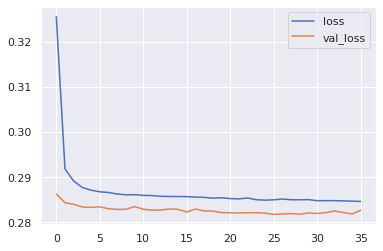

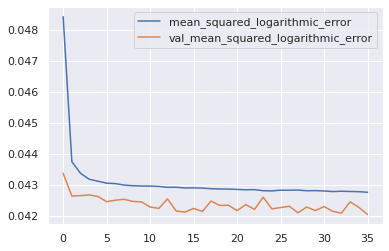

In [54]:
# Convert the Training History to a Dataframe
history_df = pd.DataFrame(History.history)
#Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot();
history_df.loc[:, ['mean_squared_logarithmic_error', 'val_mean_squared_logarithmic_error']].plot()

In [55]:
# Validation
pred = DL_Model.predict(test_X).round(0).astype(int)
amex_actual = pd.DataFrame({'target':test_y}).reset_index(drop=True)
amex_prediction = pd.DataFrame(DL_Model.predict(test_X), columns = ['prediction']).reset_index(drop=True)
Performance_df = Performance_df.append(pd.DataFrame([['Tensorflow', 'Full', accuracy_score(test_y, pred), log_loss(test_y, pred), roc_auc_score(test_y, pred),amex_metric(amex_actual,amex_prediction)]],
                                                    columns = ['Model', 'Feature Selection','Accuracy', 'Log Loss', 'ROC','Amex Metric']), sort = False)

print('Accuracy:', accuracy_score(test_y, pred))
print('Log Loss:', log_loss(test_y, pred))
print('ROC Accuracy:', roc_auc_score(test_y, pred))
print('Confusion Matrix:\n', 
       confusion_matrix(test_y, pred))
print('Amex Metric:\n', amex_metric(amex_actual,amex_prediction))

Accuracy: 0.8810689484491622
Log Loss: 4.107793005605161
ROC Accuracy: 0.8810657394509684
Confusion Matrix:
 [[86701 15314]
 [ 8954 93082]]
Amex Metric:
 0.6924307203656492


# Evaluation

<AxesSubplot:xlabel='Log Loss', ylabel='Accuracy'>

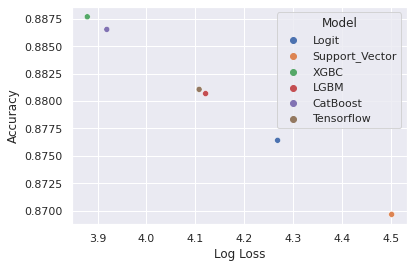

In [56]:
sns.set_theme()
sns.scatterplot(data = Performance_df, x = 'Log Loss',y = 'Accuracy', hue = 'Model', legend = 'brief')

<AxesSubplot:xlabel='Amex Metric', ylabel='Accuracy'>

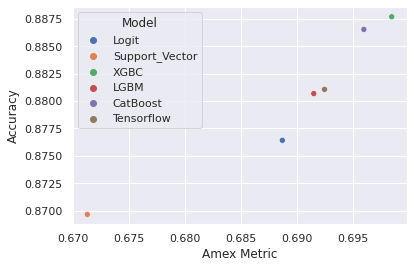

In [57]:
sns.set_theme()
sns.scatterplot(data = Performance_df, x = 'Amex Metric',y = 'Accuracy', hue = 'Model', legend = 'brief')

<AxesSubplot:xlabel='Model', ylabel='Amex Metric'>

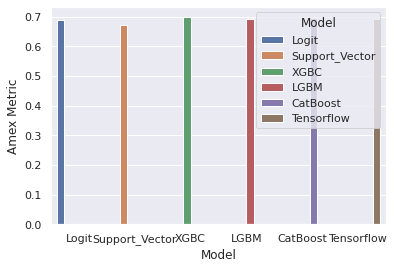

In [58]:
sns.barplot(data = Performance_df, x = 'Model',y = 'Amex Metric', hue = 'Model')

In [59]:
Performance_df

,Model,Feature Selection,Accuracy,Log Loss,ROC,Amex Metric
0,Logit,Full,0.876418,4.268417,0.876418,0.688668
0,Support_Vector,Full,0.869655,4.502002,0.869656,0.671255
0,XGBC,Full,0.887700,3.878774,0.887696,0.698426
0,LGBM,Full,0.880687,4.120994,0.880684,0.691474
0,CatBoost,Full,0.886543,3.918721,0.886540,0.695945
0,Tensorflow,Full,0.881069,4.107793,0.881066,0.692431


From the performance table, we found that XGBC model has the highest amex metric score. Let us use this model for our prediction submission. However, the testing data is enormous and we have memory limition. We will have part two to complete the submission!